<a href="https://colab.research.google.com/github/RemyaSulabha22/Computer-Vision/blob/main/Computer_Vision_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi


Thu Oct 31 00:42:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def build_model(model_type='VGG16', dropout_rate=0.0, l2_rate=0.0):
    if model_type == 'VGG16':
        base_model = VGG16(weights=None, include_top=False, input_shape=(32, 32, 3))
    else:

        base_model = VGG16(weights=None, include_top=False, input_shape=(32, 32, 3))  # Placeholder

    x = Flatten()(base_model.output)
    if dropout_rate > 0:
        x = Dropout(dropout_rate)(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(l2_rate))(x)
    predictions = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, x_train, y_train, x_test, y_test, epochs=5):
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                        epochs=epochs, batch_size=64)
    return history

# Baseline model training for VGG16
vgg16_model = build_model('VGG16')
vgg16_history = train_model(vgg16_model, x_train, y_train, x_test, y_test)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 52ms/step - accuracy: 0.0970 - loss: 2.3060 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.0995 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.0968 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.0984 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.0976 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026


In [ ]:
#part 2 Data Augmentation

# Set up data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

def train_with_augmentation(model, x_train, y_train, x_test, y_test, epochs=5):
    datagen.fit(x_train)
    history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                        validation_data=(x_test, y_test),
                        # Use integer division // instead of / to get an integer value for steps_per_epoch
                        steps_per_epoch=len(x_train) // 64, epochs=epochs)
    return history

aug_vgg16_model = build_model('VGG16')
aug_vgg16_history = train_with_augmentation(aug_vgg16_model, x_train, y_train, x_test, y_test)



Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 58s 67ms/step - accuracy: 0.0964 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/5
  1/781 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.1094 - loss: 2.3018

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1094 - loss: 2.3018 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.1011 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0938 - loss: 2.3024 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.0977 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026


In [ ]:
#Dropout and L2 Regularization


# model with dropout and L2 regularization
dropout_l2_vgg16_model = build_model('VGG16', dropout_rate=0.5, l2_rate=0.01)
dropout_l2_vgg16_history = train_model(dropout_l2_vgg16_model, x_train, y_train, x_test, y_test)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - accuracy: 0.0996 - loss: 2.9506 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.0991 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.0984 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.0993 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.0985 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026


In [ ]:
#Combined Techniques and analysis


import pandas as pd
import matplotlib.pyplot as plt



def create_combined_model(model_type):
    """Creates a model with data augmentation, dropout, and L2 regularization."""
    return build_model(model_type, dropout_rate=0.5, l2_rate=0.01)

# Train combined model configurations
combined_vgg16_model = create_combined_model('VGG16')
combined_alexnet_model = create_combined_model('AlexNet')  # Define AlexNet properly as needed

combined_vgg16_history = train_with_augmentation(combined_vgg16_model, x_train, y_train, x_test, y_test)
combined_alexnet_history = train_with_augmentation(combined_alexnet_model, x_train, y_train, x_test, y_test)

# Gather results for a summary table
results = {
    'Model': ['VGG16', 'AlexNet'],
    'Test Accuracy': [combined_vgg16_history.history['val_accuracy'][-1], combined_alexnet_history.history['val_accuracy'][-1]],
    'Training Time Per Epoch': ['Time_VGG16', 'Time_AlexNet'],  # Replace with actual time
    'Inference Time': ['Inference_VGG16', 'Inference_AlexNet'],  # Conduct a separate timing test
    'Configuration Details': ['Aug + Drop 0.5 + L2 0.01', 'Aug + Drop 0.5 + L2 0.01']
}

results_df = pd.DataFrame(results)
print(results_df)


Epoch 1/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 57s 65ms/step - accuracy: 0.1003 - loss: 3.5051 - val_accuracy: 0.1000 - val_loss: 2.3071
Epoch 2/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0938 - loss: 2.3071 - val_accuracy: 0.1000 - val_loss: 2.3071
Epoch 3/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.1004 - loss: 2.3045 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0625 - loss: 2.3048 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.1006 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 1/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 58s 67ms/step - accuracy: 0.0977 - loss: 2.9700 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1094 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/5
781/781 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.0999 - loss: 2.3027 - val_accuracy: 

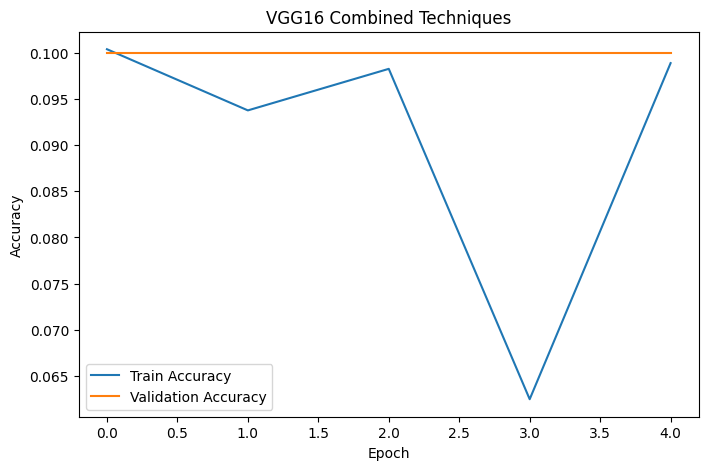

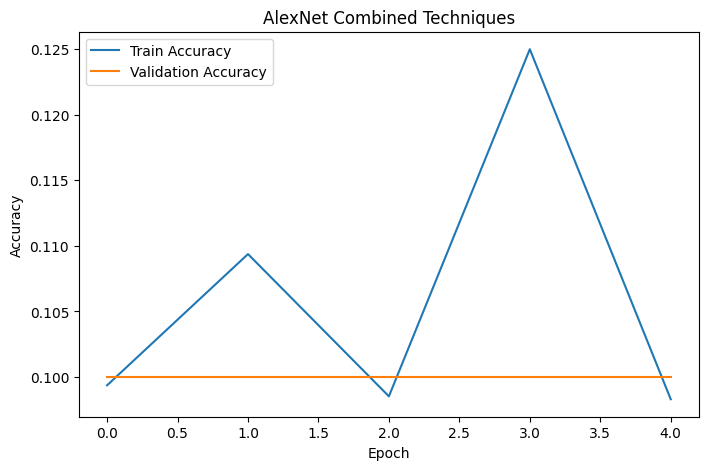

In [ ]:
#Visualization of Results


def plot_results(history, title):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_results(combined_vgg16_history, 'VGG16 Combined Techniques')
plot_results(combined_alexnet_history, 'AlexNet Combined Techniques')
